In [2]:
import numpy as np
import matplotlib.pyplot as plt

$$
\newcommand{\dd}{\mathrm{d}}
\newcommand{\bmqty}[1]{\left[\begin{matrix} #1 \end{matrix}\right]}
$$

First let us focus on the following equation
$$
\frac{\dd^2 u}{\dd x^2} = -f \tag{1}
$$
The solution depends on boundary conditions and the expression of $f$.
Now consider the following problem:
$$
\left\{
    \begin{aligned}
        \frac{\dd^2 u}{\dd x^2} = -f \quad \text{in $[0, 1]$}, \\
        f = x (1-x), \\
        u = 0 \quad \text{at the edge}
    \end{aligned}
\right.
\tag{2}
$$
The exact solution is clear:
$$
u = \frac{x}{12} - \frac{x^3}{6} + \frac{x^4}{12}
\tag{3}
$$


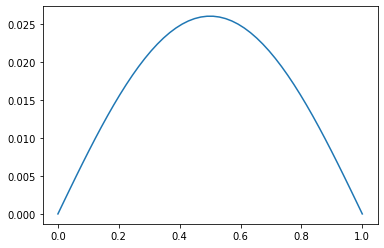

In [3]:
x_test = np.linspace(0, 1, 50)
u_the = x_test / 12 - x_test**3 / 6 + x_test**4 / 12
plt.plot(x_test, u_the)

Finite diffrential method
$$
\frac{\dd u}{\dd x} \approx \frac{u_{n+1} - u_{n}}{\Delta x}, \\
\frac{\dd^2 u}{\dd x^2} \approx \frac{u_{n+1} - 2 u_n + u_{n-1}}{(\Delta x)^2}
$$

$$
\underbrace{\frac{1}{(\Delta x)^2}\bmqty{
    -2 & 1 \\
    1 & -2 & 1 \\
    & 1 & -2 & 1 \\
    & & & \ddots \\
    & & &  1 & -2 & 1 \\
    & & & & 1 & -2 \\
    & & & & & 1
}}_{L}
\underbrace{\bmqty{ u_1 \\ u_2 \\ \\ \vdots \\ \\ u_{n-1} \\ u_n } }_{\hat{u}}
= - \underbrace{\bmqty {f_1 \\ f_2 \\ \\ \vdots \\ \\ f_{n-1} \\ 0}}_{\hat{f}}
$$

In [4]:
dx = 0.001
x = np.arange(0, 1 + dx, dx)
n = len(x)

f = x*(1-x)
L = np.zeros((n, n))

L[0,0:2] = [-2, 1]
for i in range(1, n-2):
    L[i, i-1:i+2] = [1, -2, 1]
L[n-2, n-2:n] = [1, -2]
L[n-1, n-1] = 1
L /= dx**2


In [5]:
L

array([[-2000000.,  1000000.,        0., ...,        0.,        0.,
               0.],
       [ 1000000., -2000000.,  1000000., ...,        0.,        0.,
               0.],
       [       0.,  1000000., -2000000., ...,        0.,        0.,
               0.],
       ...,
       [       0.,        0.,        0., ..., -2000000.,  1000000.,
               0.],
       [       0.,        0.,        0., ...,        0.,  1000000.,
        -2000000.],
       [       0.,        0.,        0., ...,        0.,        0.,
         1000000.]])

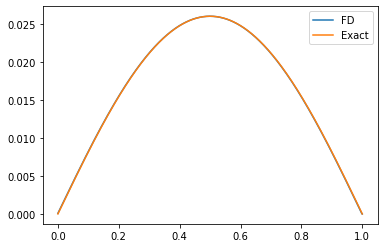

In [6]:
u_fd = np.linalg.solve(L, -f)
plt.plot(x, u_fd, label='FD')
plt.plot(x, x / 12 - x**3 / 6 + x**4 / 12, label='Exact')
plt.legend()

Another case:
$$
f = -\sin\left( \frac{\pi}{2} x \right)
$$
The exact solution:
$$
u = \frac{4}{\pi^2} \left( x - \sin \frac{\pi}{2}x \right)
$$


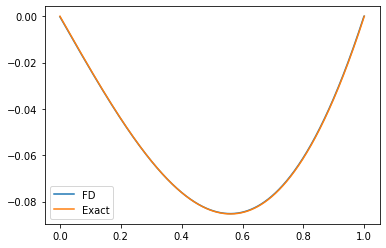

In [10]:
dx = 0.001
x = np.arange(0, 1 + dx, dx)
n = len(x)
pi = np.pi

f = - np.sin(pi/2*x)
L = np.zeros((n, n))

L[0,0:2] = [-2, 1]
for i in range(1, n-2):
    L[i, i-1:i+2] = [1, -2, 1]
L[n-2, n-2:n] = [1, -2]
L[n-1, n-1] = 1
L /= dx**2

u_fd = np.linalg.solve(L, -f)

plt.plot(x, u_fd, label='FD')
plt.plot(x, 4/pi**2*(x-np.sin(pi/2*x)), label='Exact')
plt.legend()

$$
\left\{
    \begin{aligned}
        \frac{\dd^2 u}{\dd x^2} = -f \quad \text{in $[0, 1]$}, \\
        f = - \sin\left( \frac{\pi}{2} x \right), \\
        u\big|_{x=0} = 1, \quad u\big|_{x=1}=0
    \end{aligned}
\right.
$$
The exact solution is
$$
u = - \frac{4}{\pi^2} \sin\left( \frac{\pi}{2} x \right) + \left( \frac{4}{\pi^2} - 1 \right) x + 1
$$
To convert the problem into an easier one, note that
$$
\left\{
    \begin{aligned}
        \frac{\dd^2 u}{\dd x^2} = -f \quad \text{in $[0, 1]$}, \\
        f = - \sin\left( \frac{\pi}{2} x \right), \\
        u\big|_{x=0} = 1, \quad u\big|_{x=1}=0
    \end{aligned}
\right.
$$

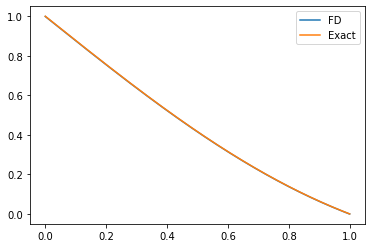

In [16]:
dx = 0.001
x = np.arange(0, 1 + dx, dx)
n = len(x)
pi = np.pi

f = -np.sin(pi/2*x)
L = np.zeros((n, n))

L[0,0:2] = [-2, 1]
for i in range(1, n-2):
    L[i, i-1:i+2] = [1, -2, 1]
L[n-2, n-2:n] = [1, -2]
L[n-1, n-1] = 1
L /= dx**2
# The boundary term. The minus sign is because the equation is L u = -f.
f[0] += 1 / dx**2

u_fd = np.linalg.solve(L, -f)

plt.plot(x, u_fd, label='FD')
plt.plot(x, -4/pi**2*np.sin(pi/2*x)+(4/pi**2-1)*x+1, label='Exact')
plt.legend()

Now we try to solve $\eqref{2}$ with FEM. First it can be noticed that $\eqref{2}$ can be refactored into
$$
\int_0^1 \frac{\dd^2 u}{\dd x^2} \delta u \dd x = \frac{\dd u}{\dd x} \delta u \big|_0^1 - \int_0^1 u \frac{\dd}{\dd x} \delta u \dd x, \\
u\big|_{x=0} = u\big|_{x=1} = 0
$$
When doing theoretical calculation we often stipulate that $\delta u = 0$ on the edge. Here, however, we do not make such assumption because usually $\delta u$ is composed with the same group of test functions that is used to approximate $u$, so it may be possible that $\delta u \neq 0$ on the edge.

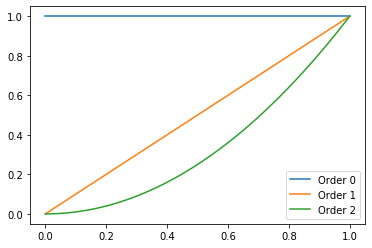

In [8]:
test_funcs = [np.poly1d([1]), np.poly1d([1, 0]), np.poly1d([1, 0, 0])]
for i in range(0, 3):
    plt.plot(x_test, test_funcs[i](x_test), label=f'Order {str(i)}')
plt.legend()

In [9]:
# the total number of meshes
n_mesh = 10
